In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### Three images

Downloaded from: https://images.cv/

In [4]:
!unzip -q northern_mockingbird.zip
!unzip -q red_headed_woodpecker.zip 
!unzip -q wood_duck.zip 

Modifying data tree structures

In [26]:
import os
import sys
from pathlib import Path
import shutil
import glob

In [9]:
List_images_dir = [
    "images_northern_mockingbird",
    "images_red_headed_woodpecker",
    "images_wood_duck"
]

In [10]:
data_path = Path.cwd()
data_path_image = os.path.join(data_path, List_images_dir[1])
data_path_image

'D:\\github_repos\\mlzoomcamp\\MLZoomcamp_2022\\08_Deep_learning\\images_red_headed_woodpecker'

In [11]:
os.listdir(data_path_image)

['data', 'readme.txt']

In [15]:
data_image_dir = os.path.join(data_path, List_images_dir[1], os.listdir(data_path_image)[0])
os.listdir(data_image_dir)

['test', 'train', 'val']

In [18]:
os.path.join(data_image_dir, 'train')

'D:\\github_repos\\mlzoomcamp\\MLZoomcamp_2022\\08_Deep_learning\\images_red_headed_woodpecker\\data\\train'

In [36]:
pathlib_img = Path(os.path.join(data_image_dir, 'train'))
len(list(pathlib_img.glob('*/*')))

84

In [88]:
targets_path = os.path.join(data_path, image_collection_path)
targets_path

'D:\\github_repos\\mlzoomcamp\\MLZoomcamp_2022\\08_Deep_learning\\BirdImages'

In [89]:
def moving_set_images(image_bird_dir, species):
    """
    Moving train, val, test images up to each specified set on each image directory
    """
    data_image_dir = os.path.join(data_path, image_bird_dir, 'data')
    for sets in os.listdir(data_image_dir):
        source = os.path.join(data_image_dir, sets)
        trg_path = os.path.join(targets_path, sets, species)
        for src_file in  glob.glob(os.path.join(source, os.listdir(source)[0], '*.*')):
            if not os.path.isdir(trg_path):
                os.makedirs(trg_path)
            shutil.copy(src_file, trg_path)

In [93]:
Species = ["Northern_mockingbird", "Red_headed_Woodpecker", "Wood_duck"]

In [92]:
moving_set_images(List_images_dir[0], Species[0])
moving_set_images(List_images_dir[1], Species[1])
moving_set_images(List_images_dir[2], Species[2])

In [76]:
image_collection_path = "BirdImages"

if not os.path.isdir(image_collection_path):
    os.makedirs(image_collection_path)

In [248]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = Path("BirdImages")
IMAGE_SIZE = (260, 260)
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

Found 291 files belonging to 3 classes.
Found 151 files belonging to 3 classes.
Found 151 files belonging to 3 classes.


In [97]:
class_names = train_dataset.class_names
print(class_names)

['Northern_mockingbird', 'Red_headed_Woodpecker', 'Wood_duck']


In [98]:
validation_dataset.class_names

['Northern_mockingbird', 'Red_headed_Woodpecker', 'Wood_duck']

In [99]:
test_dataset.class_names

['Northern_mockingbird', 'Red_headed_Woodpecker', 'Wood_duck']

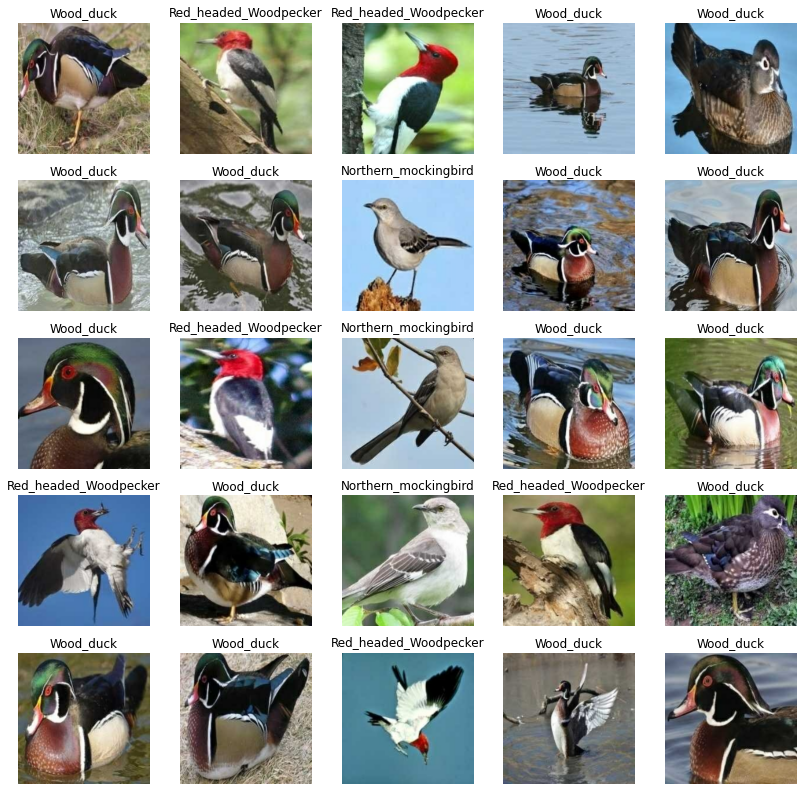

In [249]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(14,14))
 
for images, labels in train_dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

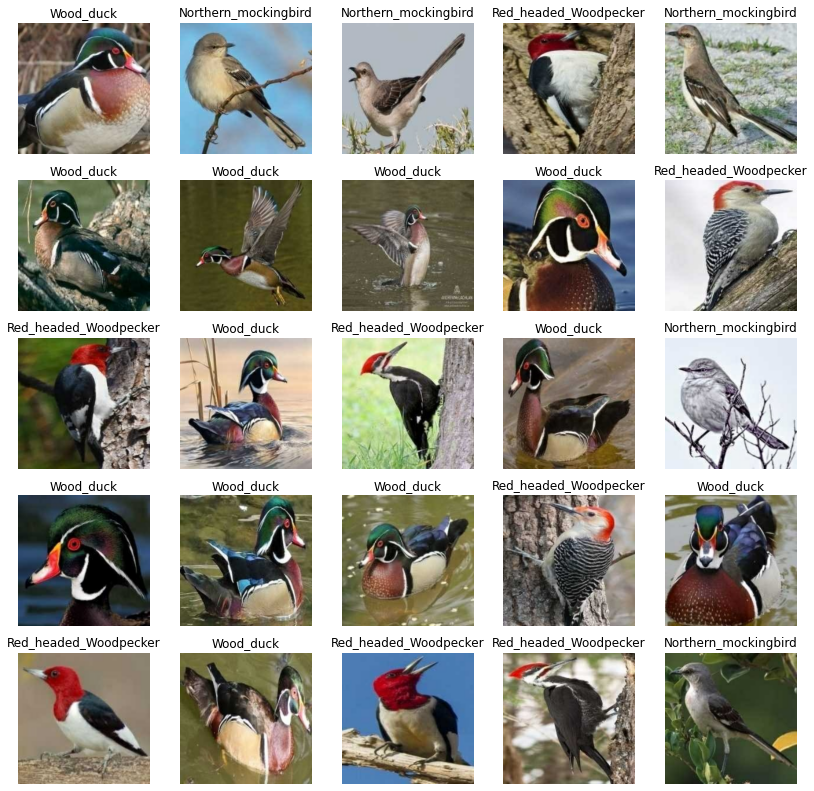

In [250]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(14,14))
 
for images, labels in validation_dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

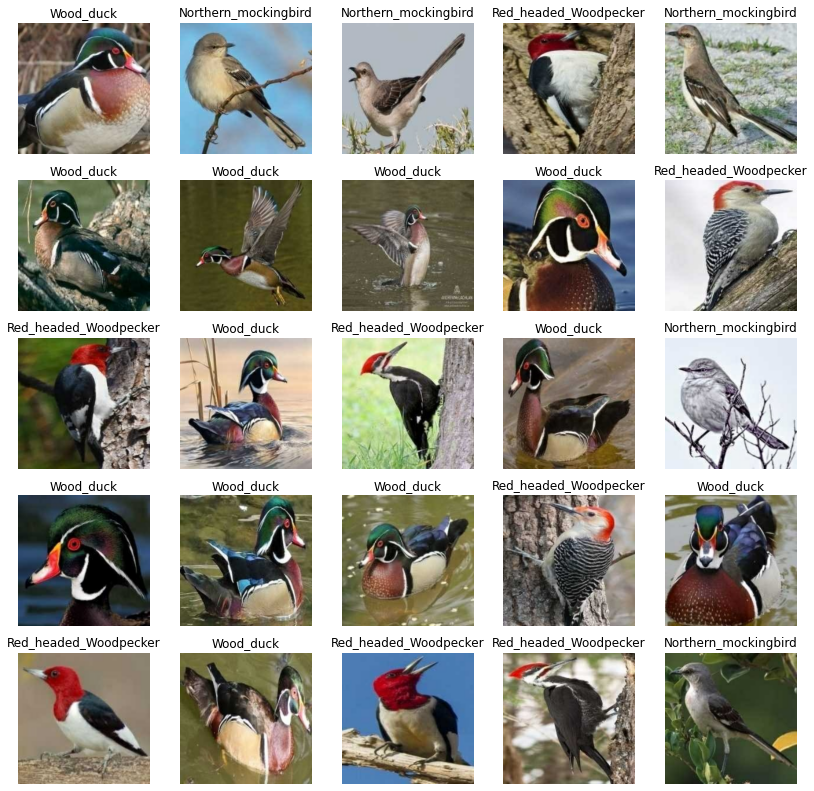

In [251]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(14,14))
 
for images, labels in test_dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [106]:
for images, labels in test_dataset.take(1):
    for i in range(10):
        print(labels[i])

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [252]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_train = train_dataset.map(lambda x, y: (normalization_layer(x), y))
normalized_validation = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
normalized_test = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [253]:
type(normalized_train)

tensorflow.python.data.ops.dataset_ops.MapDataset

Use buffered prefetching to load images from disk without having I/O become blocking

In [254]:
AUTOTUNE = tf.data.AUTOTUNE

normalized_train = normalized_train.prefetch(buffer_size=AUTOTUNE)
normalized_validation = normalized_validation.prefetch(buffer_size=AUTOTUNE)
normalized_test = normalized_test.prefetch(buffer_size=AUTOTUNE)

### EfficientNet

In [255]:
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.efficientnet import decode_predictions

In [256]:
from tensorflow.keras.models import Sequential

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [257]:
def build_model(num_classes):
    inputs = layers.Input(shape=(260, 260, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB2(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(3, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    
    return model


In [262]:
model = build_model(num_classes=3)

In [263]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 260, 260, 3)  0           ['input_23[0][0]']               
                                                                                                  
 rescaling_13 (Rescaling)       (None, 260, 260, 3)  0           ['img_augmentation[1][0]']       
                                                                                                  
 normalization_11 (Normalizatio  (None, 260, 260, 3)  7          ['rescaling_13[0][0]']

In [264]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'model_efficient_net.h5', save_best_only=True, 
    monitor='val_accuracy', verbose=0)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", patience=5, min_lr=1e-4, mode='max')

earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min'
)

callback_list = [checkpointer, earlystopping, lr_reducer]

with tf.device("/device:GPU:0"):
    result = model.fit(train_dataset,
                   batch_size=32,
                   epochs=20,
                   validation_data=validation_dataset,
                   callbacks=callback_list
                   )

Epoch 1/20
10/10 [==============================] - 39s 2s/step - loss: 1.2900 - accuracy: 0.4914 - val_loss: 0.6050 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 0.2334 - accuracy: 0.9141 - val_loss: 0.3311 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 15s 1s/step - loss: 0.1551 - accuracy: 0.9485 - val_loss: 0.2373 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 15s 1s/step - loss: 0.0907 - accuracy: 0.9691 - val_loss: 0.1930 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 15s 1s/step - loss: 0.0496 - accuracy: 0.9897 - val_loss: 0.1631 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 15s 1s/step - loss: 0.0673 - accuracy: 0.9828 - val_loss: 0.1383 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 15s 1s/step - loss: 0.0716 - a

In [265]:
### Prediction

modelLoad_eff_net = keras.models.load_model(os.path.join(os.getcwd(), "model_efficient_net.h5"))
modelLoad_eff_net.evaluate(validation_dataset, verbose=0)

[0.3311007618904114, 1.0]

In [293]:
pred = modelLoad_eff_net.predict(test_dataset)
predictions = np.argmax(pred, axis=1)

5/5 [==============================] - 1s 192ms/step


In [294]:
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

In [295]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, predictions)

array([[14, 11, 20],
       [11, 12, 13],
       [20, 13, 37]], dtype=int64)

In [291]:
import seaborn as sns

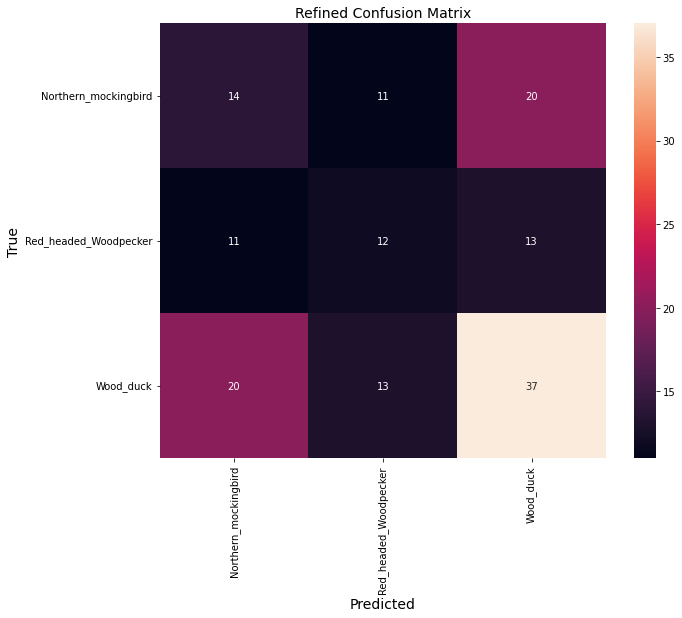

In [296]:
cm = confusion_matrix(y_true, predictions)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=14)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=14)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=14)
plt.show()

### Another way: Implementing Practice from F Chollet

In [297]:
conv_base_effnet = EfficientNetB2(
    weights="imagenet", 
    input_shape=(260, 260, 3), 
    include_top=False,
    drop_connect_rate=0.5
)

In [298]:
image_batch, label_batch = next(iter(normalized_train))
feature_batch = model(image_batch)
print(feature_batch.shape)

(32, 3)


In [300]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0,
       2, 1, 2, 2, 1, 2, 0, 1, 2, 0])>

In [301]:
conv_base_effnet.trainable = False

In [299]:
inputs = layers.Input(shape=(260, 260, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB2(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(3, activation="softmax", name="pred")(x)

In [302]:
inputs = tf.keras.Input(shape=(260, 260, 3))
x = img_augmentation(inputs)
x = conv_base_effnet(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_eff_net_2 = keras.Model(inputs, outputs)

In [303]:
model_eff_net_2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

model_eff_net_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 260, 260, 3)]     0         
                                                                 
 img_augmentation (Sequentia  (None, 260, 260, 3)      0         
 l)                                                              
                                                                 
 efficientnetb2 (Functional)  (None, 9, 9, 1408)       7768569   
                                                                 
 global_average_pooling2d_4   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_4 (Batc  (None, 1408)             5632      
 hNormalization)                                                 
                                                           

In [304]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'model_eff_net_augmentation.keras', save_best_only=True, 
    monitor='val_accuracy', verbose=0)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", patience=5, min_lr=1e-4, mode='max')

earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min'
)

callback_list = [checkpointer, earlystopping, lr_reducer]

In [305]:
with tf.device("/device:GPU:0"):
    result = model_eff_net_2.fit(train_dataset,
                   batch_size=32,
                   epochs=20,
                   validation_data=validation_dataset,
                   callbacks=callback_list
                   )

Epoch 1/20
10/10 [==============================] - 34s 2s/step - loss: 1.1612 - accuracy: 0.5292 - val_loss: 0.5619 - val_accuracy: 0.9470 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 16s 2s/step - loss: 0.3569 - accuracy: 0.8591 - val_loss: 0.3275 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 15s 1s/step - loss: 0.1289 - accuracy: 0.9588 - val_loss: 0.2341 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 0.1271 - accuracy: 0.9416 - val_loss: 0.1835 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 15s 1s/step - loss: 0.1149 - accuracy: 0.9622 - val_loss: 0.1526 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 14s 1s/step - loss: 0.0876 - accuracy: 0.9828 - val_loss: 0.1297 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 14s 1s/step - loss: 0.0923 - a

In [306]:
test_model = keras.models.load_model(
    "model_eff_net_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 4s 125ms/step - loss: 0.2341 - accuracy: 1.0000
Test accuracy: 1.000


In [307]:
pred = test_model.predict(test_dataset)
predictions = np.argmax(pred, axis=1)

y_true = np.concatenate([y for x, y in test_dataset], axis=0)

5/5 [==============================] - 4s 216ms/step


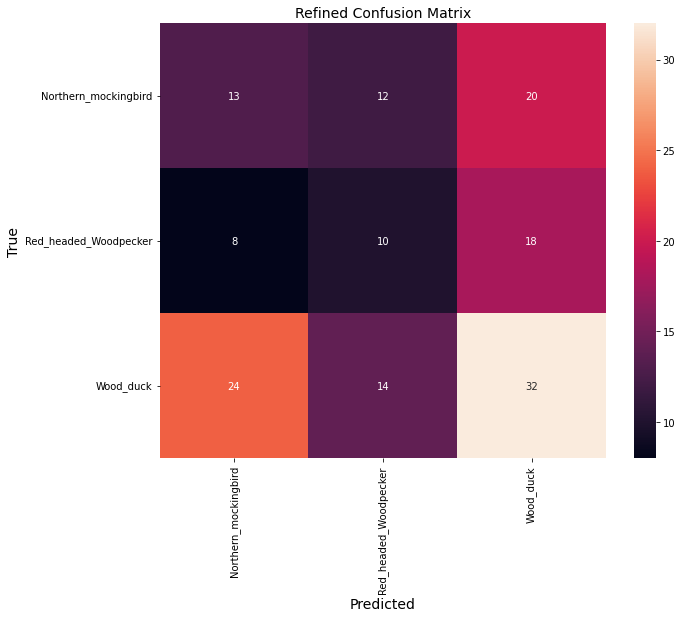

In [308]:
cm = confusion_matrix(y_true, predictions)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=14)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=14)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=14)
plt.show()

### Approach B: VGG16

In [220]:
train_dir = os.path.join(os.getcwd(), "BirdImages", "train")
val_dir = os.path.join(os.getcwd(), "BirdImages", "val")
test_dir = os.path.join(os.getcwd(), "BirdImages", "test")

IMAGE_SIZE = (180, 180)

def loading_dataset_from_dir():
    # create list of datasets
    datasets = [train_dir, val_dir, test_dir]
    output = []
    
    for dataset in datasets:
        
        images1 = []
        labels1 = []
        print(f"loading {dataset}")
        
        for folder in os.listdir(dataset):
            # assign labels to each folder images
            label = class_labels[folder]
            for file in os.listdir(os.path.join(dataset,folder)):
                image_path = os.path.join(os.path.join(dataset, folder), file)
                # read the image files stored in image_path
                image_file = cv2.imread(image_path)
                image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
                image_file = cv2.resize(image_file, IMAGE_SIZE)
                
                images1.append(image_file)
                labels1.append(label)
                
        # convert the images and labels list to numpy array
        images1 = np.array(images1, dtype = 'float32')
        labels1 = np.array(labels1, dtype = 'int32')
        
        output.append((images1, labels1))
        print("Images file have been loaded")
                
    return output 

In [221]:
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
print(class_labels)

{'Northern_mockingbird': 0, 'Red_headed_Woodpecker': 1, 'Wood_duck': 2}


In [222]:
import cv2

((train_images, train_labels), (val_images, val_labels), (test_images, test_labels)) = loading_dataset_from_dir()

loading D:\github_repos\mlzoomcamp\MLZoomcamp_2022\08_Deep_learning\BirdImages\train
Images file have been loaded
loading D:\github_repos\mlzoomcamp\MLZoomcamp_2022\08_Deep_learning\BirdImages\val
Images file have been loaded
loading D:\github_repos\mlzoomcamp\MLZoomcamp_2022\08_Deep_learning\BirdImages\test
Images file have been loaded


In [223]:
print(f"======train dataset size======")
len(train_images), len(train_labels)

======train dataset size======


(291, 291)

In [224]:
# normalize the images dataset
trn_images_norm = train_images/255.0
val_images_norm = val_images/255.0

In [225]:
trn_images_norm[0].shape

(180, 180, 3)

In [226]:
conv_base = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

In [227]:
train_featuremap = conv_base.predict(trn_images_norm)
val_featuremap = conv_base.predict(val_images_norm) 

2/2 [==============================] - 0s 100ms/step


In [228]:
train_featuremap.shape, val_featuremap.shape

((291, 5, 5, 512), (53, 5, 5, 512))

In [229]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = data_augmentation(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_seq = keras.Model(inputs, outputs)

In [230]:
model_seq.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

In [231]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'model_seq.h5', save_best_only=True, 
    monitor='val_accuracy', verbose=0)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", patience=5, min_lr=1e-4, mode='max')

earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min'
)

callback_list = [checkpointer, earlystopping, lr_reducer]

In [232]:
with tf.device("/device:GPU:0"):
    result = model_seq.fit(train_featuremap, train_labels,
                   batch_size=32,
                   epochs=20,
                   validation_data=(val_featuremap, val_labels),
                   callbacks=callback_list
                   )

Epoch 1/20
10/10 [==============================] - 18s 1s/step - loss: 10.7841 - accuracy: 0.4467 - val_loss: 0.4195 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 11s 1s/step - loss: 1.2498 - accuracy: 0.7801 - val_loss: 0.3943 - val_accuracy: 0.9245 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 0.3713 - accuracy: 0.9175 - val_loss: 0.3321 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 0.5677 - accuracy: 0.8969 - val_loss: 0.5312 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 13s 1s/step - loss: 0.2903 - accuracy: 0.9244 - val_loss: 0.1367 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 12s 1s/step - loss: 0.3467 - accuracy: 0.9381 - val_loss: 0.5321 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 12s 1s/step - loss: 0.2618 - 

In [233]:
modelLoad = keras.models.load_model(os.path.join(os.getcwd(), "model_seq.h5"))
modelLoad.evaluate(val_featuremap, val_labels, verbose=0)

[0.2193792462348938, 0.9811320900917053]

### Predict on Test images

In [234]:
test_featuremap = conv_base.predict(test_images)

5/5 [==============================] - 1s 180ms/step


In [235]:
test_images.shape

(151, 180, 180, 3)

In [236]:
pred = modelLoad.predict(test_featuremap)
predictions = np.argmax(pred, axis=1)

5/5 [==============================] - 0s 3ms/step


In [237]:
def images_classifier(images_paths, class_names):
    file_array2 = []
    
    for file2 in images_paths:
        image_file = cv2.imread(file2)
        image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
        image_file = cv2.resize(image_file, IMAGE_SIZE)
        file_array2.append(image_file)
        
    file_array2 = np.array(file_array2, dtype = 'float32')
    test_images = file_array2/255.0
    
    # run thorought the convolutional base and then model2
    test_featuremap = conv_base.predict(test_images)
    
    # run img_arr of shape (9,4,4,512) through model2
    img_pred = modelLoad.predict(test_featuremap)
    img_predf = np.argmax(img_pred, axis=1)
    print("shape of the predicted array:", img_predf.shape)
    
    # plot the 20 unseen images and predicted class
    plt.figure(figsize=(21,17))
    
    for idx, i in enumerate(img_predf):
        plt.subplot(4,4, idx+1)
        plt.imshow(test_images[idx])
        plt.title(f"prediction of image: {class_names[i]}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle("Samples predicition of modelLoad on unseen data", size=20, weight='bold')
    plt.show()

1/1 [==============================] - 0s 20ms/step
shape of the predicted array: (16,)


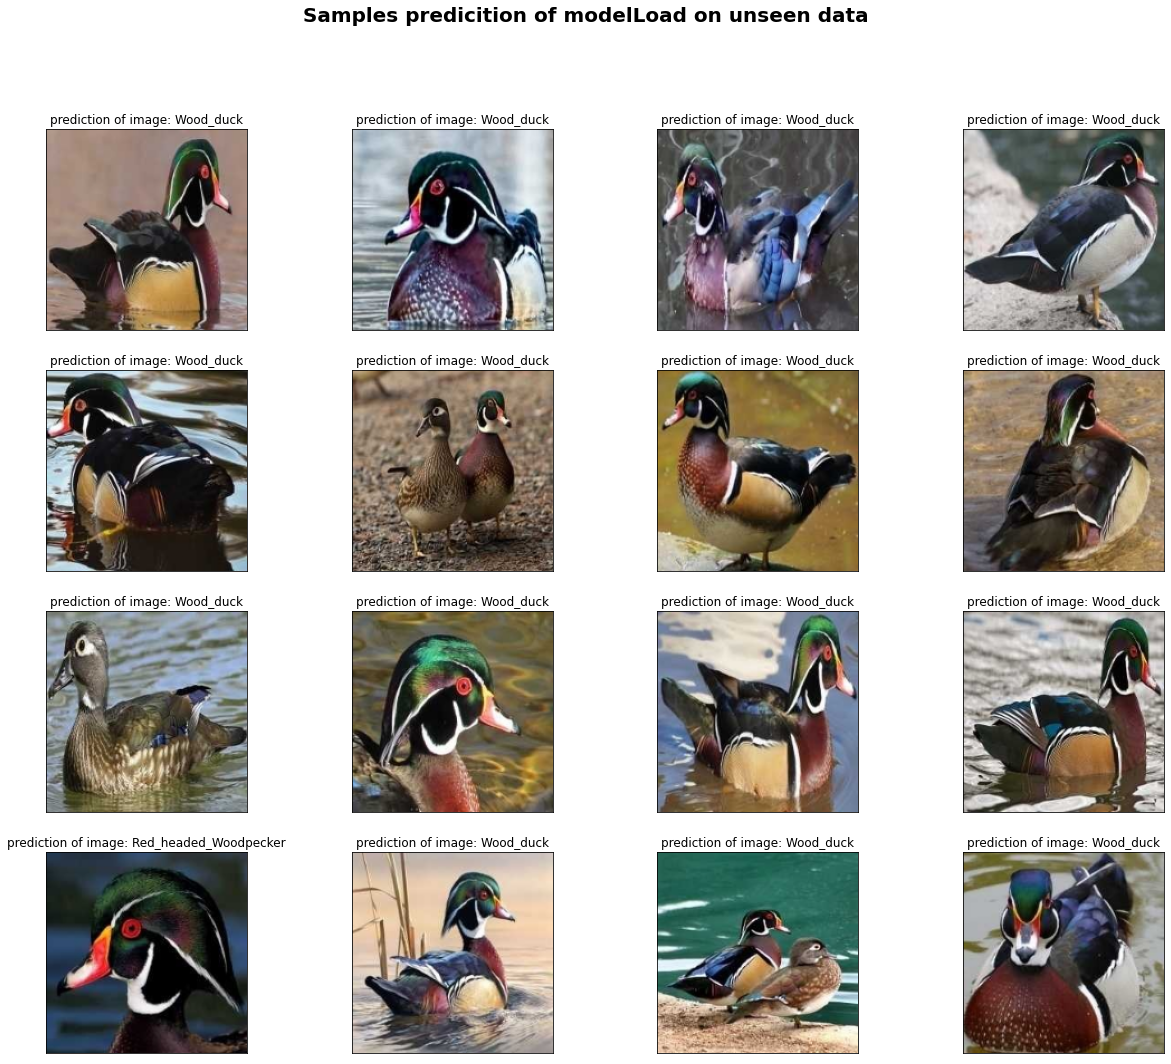

In [238]:
images_classifier(images_paths[90:106], class_names)

In [185]:
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names


pred_dir = os.path.join(os.getcwd(), "BirdImages", "test")
images_paths = getImagePaths(pred_dir)
len(images_paths)

151

In [200]:


# Build the tensorflow datasets
IMSIZES = (224, 240, 260, 300, 380, 456, 528, 600)
# index i corresponds to b-i
size_pick = IMSIZES[2]
size_pick

260